### Programming Assignment 4
* CSCI-5930 ML Spring 2019
* Author: Bhuwan Sapkota

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import AdaBoostClassifier

In [2]:
#Load the CSV. And it does have a header
dataset = pd.read_csv('dataset.csv')
dataset = dataset.drop(['Id'], axis=1)

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
#spliting input and target
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [5]:
#spliting the Training Test Data
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2)

#coverting to floate so standard scalar wouldn't complain
XTrain = XTrain.astype(np.float64)
XTest = XTest.astype(np.float64)

In [6]:
scaler = StandardScaler()  
scaler.fit(XTrain)
XTrain = scaler.transform(XTrain)  
XTest = scaler.transform(XTest)

### Task 1 & Task 2

In [21]:
Acc_Sc_Ad_Train = []
Acc_Sc_Ad_Test = []
Acc_Sc_Bl_Train = []
Acc_Sc_Bl_Test = []

for i in range(0,100):
    #creating adaboost sklearn and fitting it
    ADBC = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=7),
        n_estimators= (i+1),
        learning_rate=2,
        algorithm="SAMME.R")
    ADBC.fit(XTrain,yTrain)
    
    #only using base classifier
    BL = DecisionTreeClassifier(max_depth=7) 
    BL.fit(XTrain, yTrain) 
    
    predTrainAda = ADBC.predict(XTrain)
    predTestAda = ADBC.predict(XTest)
    predTrainBL = BL.predict(XTrain)
    predTestBL = BL.predict(XTest)
    
    Acc_Sc_Ad_Train.append(accuracy_score(yTrain, predTrainAda))
    Acc_Sc_Ad_Test.append(accuracy_score(yTest, predTestAda))
    Acc_Sc_Bl_Train.append(accuracy_score(yTrain, predTrainBL))
    Acc_Sc_Bl_Test.append(accuracy_score(yTest, predTestBL))
    if not (i+1)%10:
        print("iteration: " + str(i+1))

iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50
iteration: 60
iteration: 70
iteration: 80
iteration: 90
iteration: 100


### Task 3

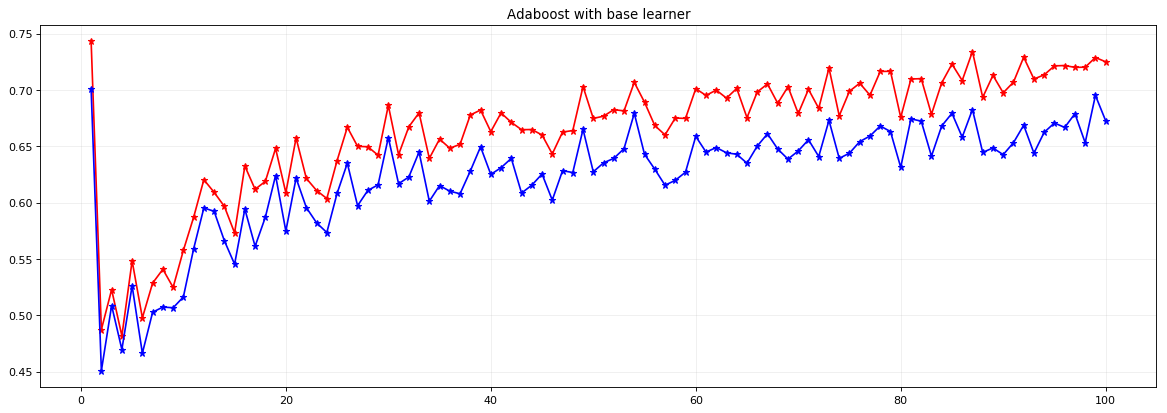

In [25]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Adaboost with base learner')
plt.grid(which="major", alpha=0.2)
plt.grid(which="minor", alpha=0.5)
plt.plot(range(1,len(Acc_Sc_Ad_Train)+1),Acc_Sc_Ad_Train,'*r-',
        range(1,len(Acc_Sc_Ad_Test)+1),Acc_Sc_Ad_Test,'*b-')

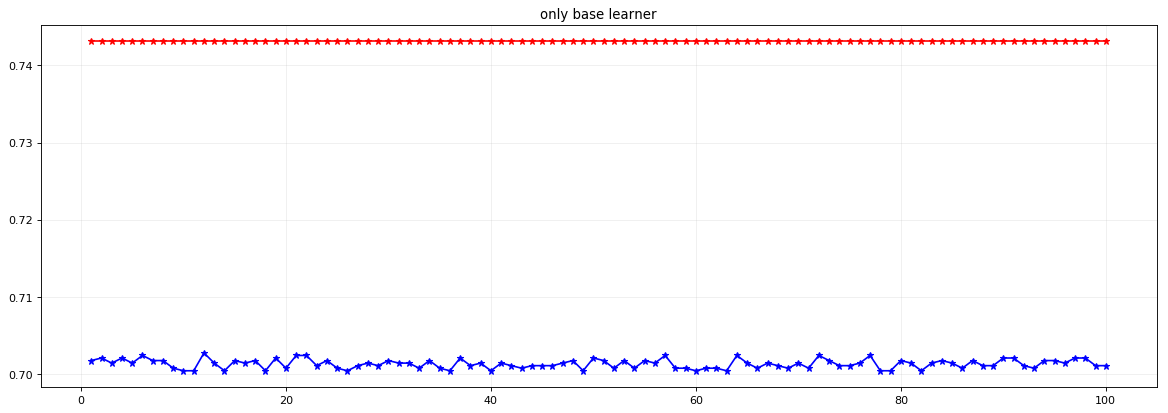

In [23]:

plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('only base learner')
plt.grid(which="major", alpha=0.2)
plt.grid(which="minor", alpha=0.5)
plt.plot()

### Task 4

In [10]:
# As number of rounds go up the number of misclassified items go down which obviously helps to increase the 
# accuracy of the model. This can be seen in above graph.

### Task 5 (optional)

In [11]:
#Load the CSV. And it does have a header
datasetJ = pd.read_csv('judge-no-labels.csv')
# exporting the predition to csv file
Id = datasetJ['Id'].values
datasetJ = datasetJ.drop(['Id'], axis=1)

In [12]:
datasetJ.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_Judge = datasetJ.values

In [14]:
scaler = StandardScaler()  
scaler.fit(X_Judge)
X_Judge = scaler.transform(X_Judge)

/Users/Bhuwan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Bhuwan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
#finally predicting the age
Cover_Type = ADBC.predict(X_Judge)

In [16]:
a, c = np.unique(Cover_Type, return_counts=True)

In [17]:
a

array([1, 2, 3, 4, 5, 6, 7])

In [18]:
c

array([137419, 198689,  73440,  17226,  54276,  54466,  30376])

In [19]:
Id

array([ 15121,  15122,  15123, ..., 581010, 581011, 581012])

In [20]:
#transposing the output column
Cover_Type = Cover_Type.reshape((-1, 1))
Id = Id.reshape((-1, 1))

#concatinating ID and prediction)) #concatinating ID and prediction
result = np.hstack((Id,Cover_Type))

header=["Id","Cover_Type"]    #header name

#making dataframe ready to write to csv
df2 = pd.DataFrame(data=result,columns=header) 
df2.Id = df2.Id.astype('int64') 

df2.to_csv('judge-predictions.csv', sep=',',index=False)   #printing to csv.